In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(11,8)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
df = pd.read_csv("heart_2020_cleaned.csv")

## Data Cleaning

In [3]:
data = df.copy()

In [4]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
data.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
for i in data.columns:
    print(i,data[i].unique())
    print("="*60)

HeartDisease ['No' 'Yes']
BMI [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking ['Yes' 'No']
AlcoholDrinking ['No' 'Yes']
Stroke ['No' 'Yes']
PhysicalHealth [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
DiffWalking ['No' 'Yes']
Sex ['Female' 'Male']
AgeCategory ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity ['Yes' 'No']
GenHealth ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
SleepTime [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Asthma ['Yes' 'No']
KidneyDisease ['No' 'Yes']
Skin

In [8]:
# fatch the age from this catigorical colums  and conver in to numeric
data["AgeCategory"] = data["AgeCategory"].apply(lambda x:x.split("-")).str[0]
data["AgeCategory"] = data["AgeCategory"].apply(lambda x:x.replace(" or older","")).astype(int)

In [9]:
# clean the extea space
data["Diabetic"] = data["Diabetic"].apply(lambda x:x.split(" ")).str[0]
data["Diabetic"] = data["Diabetic"].apply(lambda x:x.replace(",",""))

In [10]:
# convert in to binary 0 for no and 1 for yes
data["Diabetic"] = data["Diabetic"].map({"Yes":1,"No":0})
data["HeartDisease"] = data["HeartDisease"].map({"Yes":1,"No":0})
data["Smoking"] = data["Smoking"].map({"Yes":1,"No":0})
data["AlcoholDrinking"] = data["AlcoholDrinking"].map({"Yes":1,"No":0})
data["Stroke"] = data["Stroke"].map({"Yes":1,"No":0})
data["DiffWalking"] = data["DiffWalking"].map({"Yes":1,"No":0})
data["PhysicalActivity"] = data["PhysicalActivity"].map({"Yes":1,"No":0})
data["Asthma"] = data["Asthma"].map({"Yes":1,"No":0})
data["KidneyDisease"] = data["KidneyDisease"].map({"Yes":1,"No":0})
data["SkinCancer"] = data["SkinCancer"].map({"Yes":1,"No":0})

In [11]:
one = OneHotEncoder()

In [12]:
one.fit_transform(data[["Race"]]).toarray()

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [13]:
pd.DataFrame(one.fit_transform(data[["Race"]]).toarray(),columns=one.get_feature_names())

,x0_American Indian/Alaskan Native,x0_Asian,x0_Black,x0_Hispanic,x0_Other,x0_White
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
319790,0.0,0.0,0.0,1.0,0.0,0.0
319791,0.0,0.0,0.0,1.0,0.0,0.0
319792,0.0,0.0,0.0,1.0,0.0,0.0
319793,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
one.transform([["White"]]).toarray()

array([[0., 0., 0., 0., 0., 1.]])

## EDA

In [15]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40,White,0,1,Very good,8.0,0,0,0


In [16]:
data.shape

(319795, 18)

In [17]:
data.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,52.440945,0.135590,0.775362,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,18.069747,0.342353,0.417344,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,40.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,55.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,65.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,80.000000,1.000000,1.000000,24.000000,1.000000,1.000000,1.000000


In [18]:
catigorical_features = data.dtypes[data.dtypes == "object"].index

In [19]:
numerical_features = data.dtypes[data.dtypes != "object"].index

In [20]:
catigorical_features

Index(['Sex', 'Race', 'GenHealth'], dtype='object')

In [21]:
numerical_features

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'AgeCategory',
       'Diabetic', 'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

In [22]:
for i in catigorical_features:
    print(i,data[i].value_counts(normalize=True)*100)
    print("="*60)

Sex Female    52.472678
Male      47.527322
Name: Sex, dtype: float64
Race White                             76.677872
Hispanic                           8.582373
Black                              7.173033
Other                              3.417189
Asian                              2.522866
American Indian/Alaskan Native     1.626667
Name: Race, dtype: float64
GenHealth Very good    35.603433
Good         29.121468
Excellent    20.901515
Fair         10.843509
Poor          3.530074
Name: GenHealth, dtype: float64


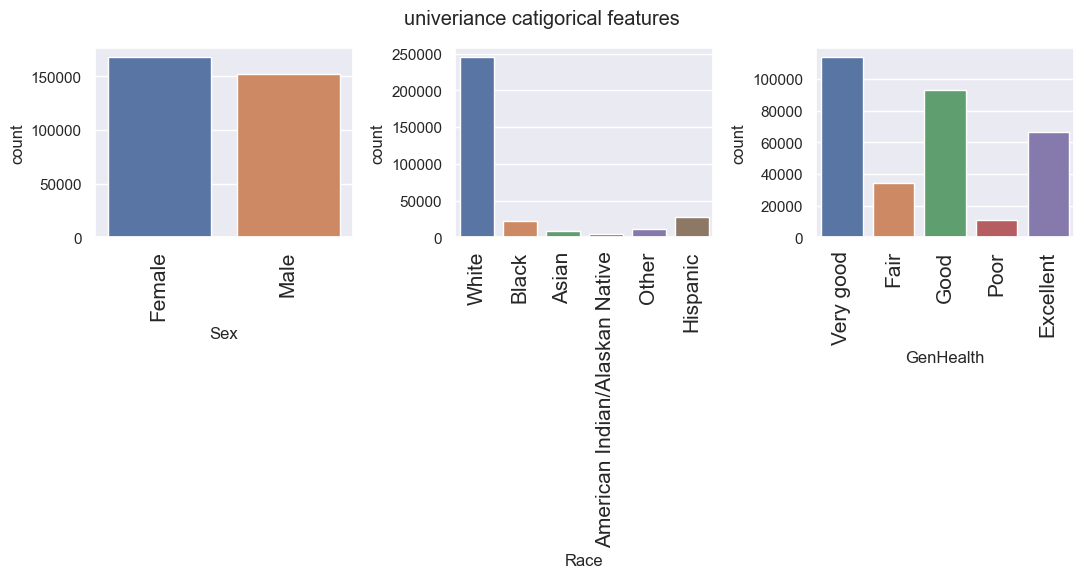

In [23]:
try:
    plt.suptitle("univeriance catigorical features")
    for i in range(0,len(catigorical_features)):
        plt.subplot(2,3,i+1)
        sns.countplot(data[catigorical_features[i]])
        plt.xticks(size=15,rotation=90)
        plt.tight_layout()
except Exception as e:
    print(e)

num must be 1 <= num <= 12, not 13


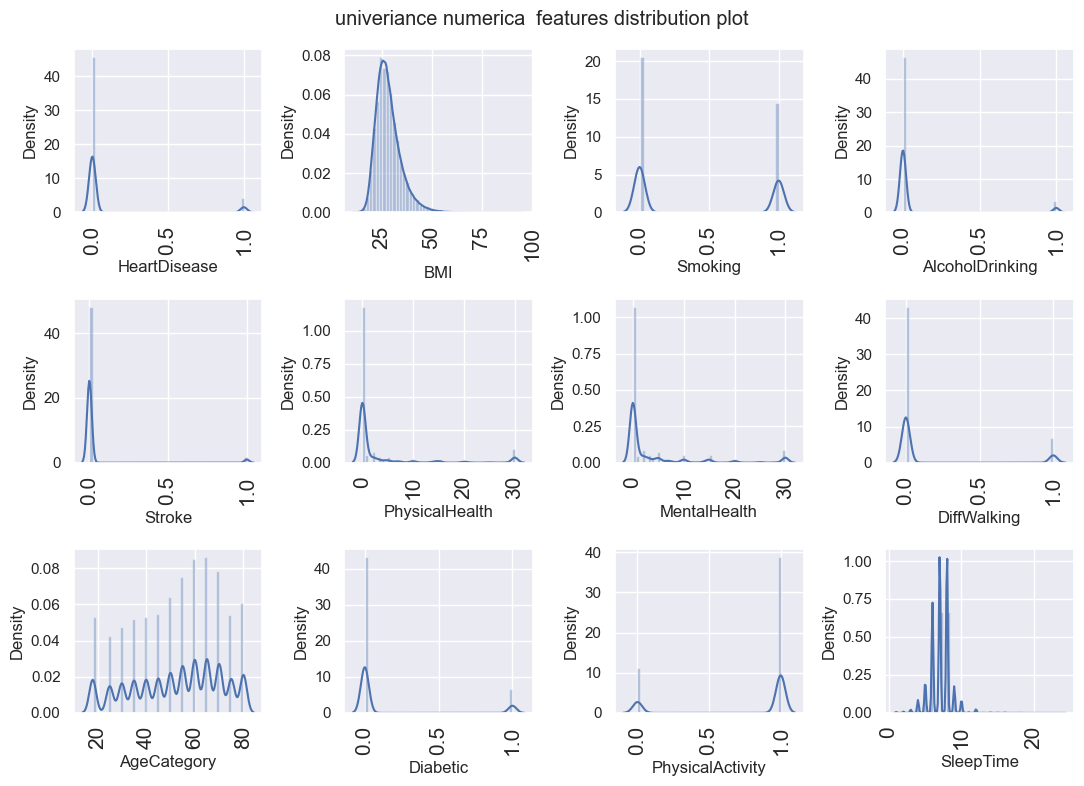

In [24]:
try:
    plt.suptitle("univeriance numerica  features distribution plot")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.distplot(data[numerical_features[i]])
        plt.xticks(size=15,rotation=90)
        plt.tight_layout()
except Exception as e:
    print(e)

num must be 1 <= num <= 12, not 13


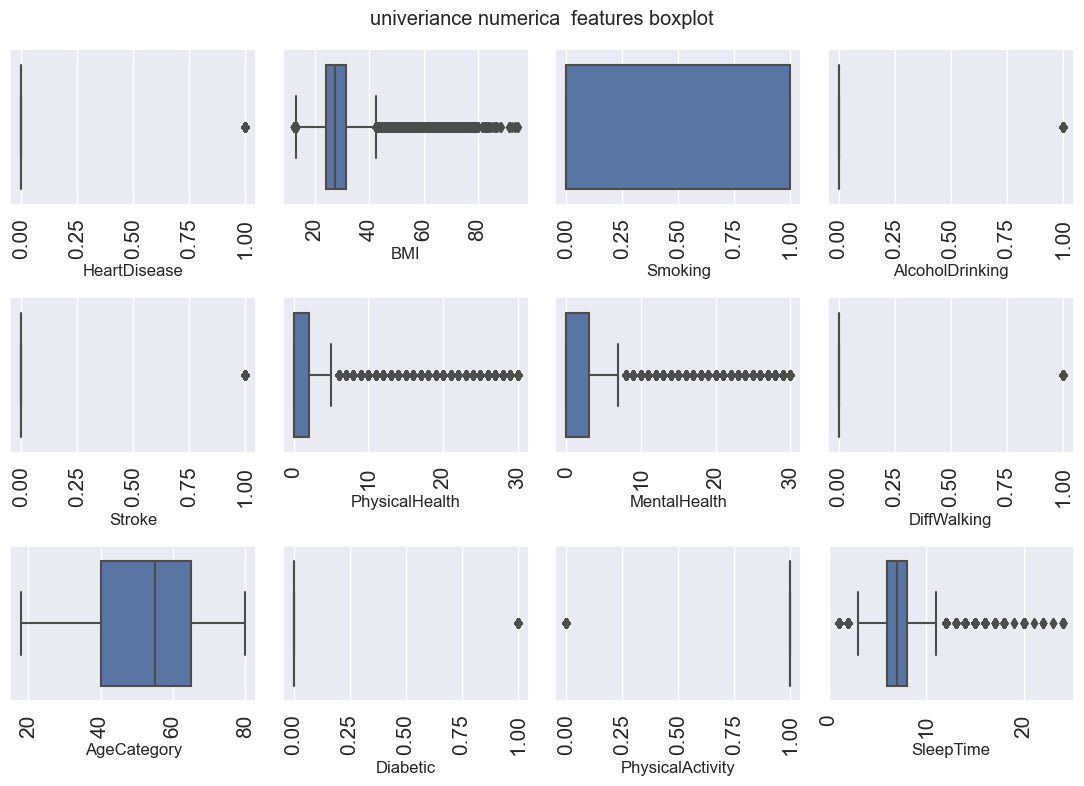

In [25]:
try:
    plt.suptitle("univeriance numerica  features boxplot")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.boxplot(data[numerical_features[i]])
        plt.xticks(size=15,rotation=90)
        plt.tight_layout()
except Exception as e:
    print(e)

<AxesSubplot:>

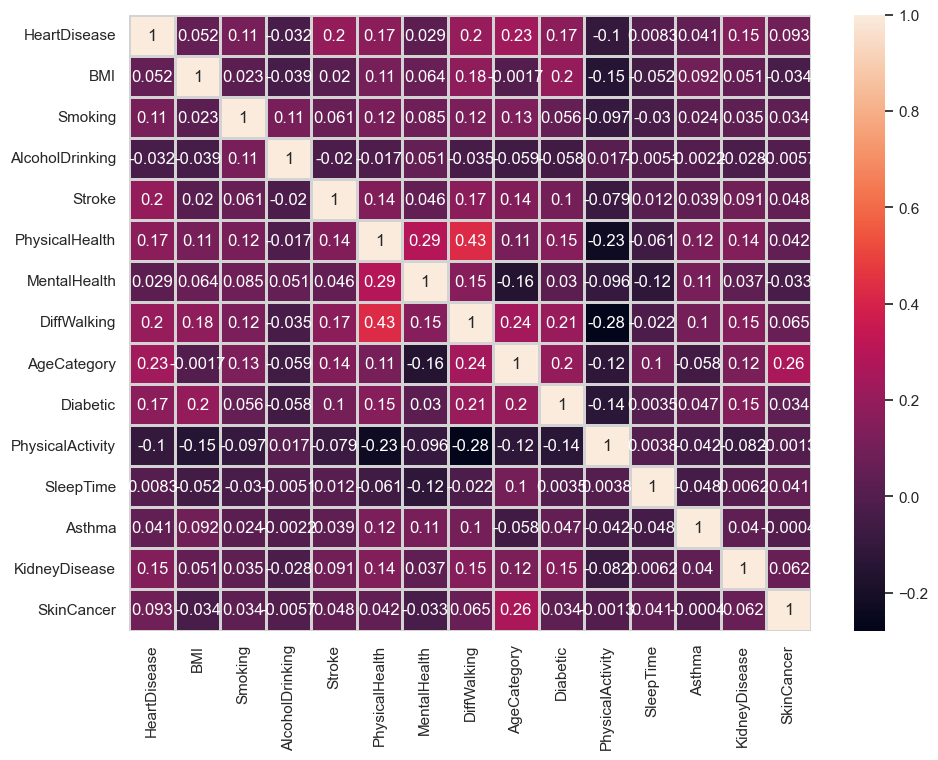

In [26]:
sns.heatmap(data.corr(),annot = True, linewidths = 2, linecolor = 'lightgrey')

In [27]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40,White,0,1,Very good,8.0,0,0,0


<AxesSubplot:xlabel='HeartDisease'>

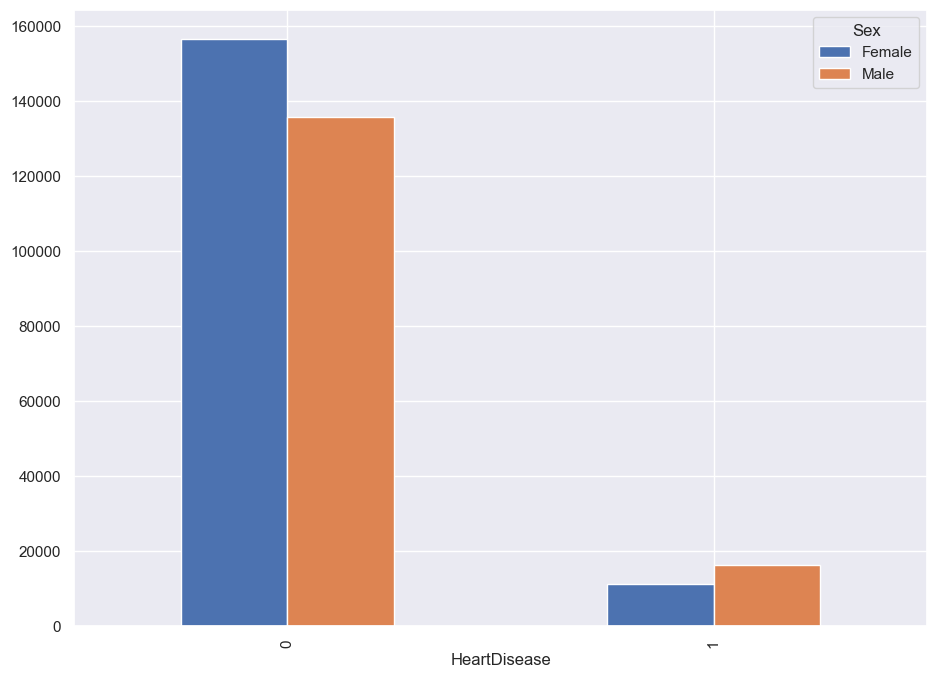

In [28]:
cross_plot = pd.crosstab(data["HeartDisease"],data["Sex"])
cross_plot.plot(kind="bar")

<AxesSubplot:xlabel='Smoking'>

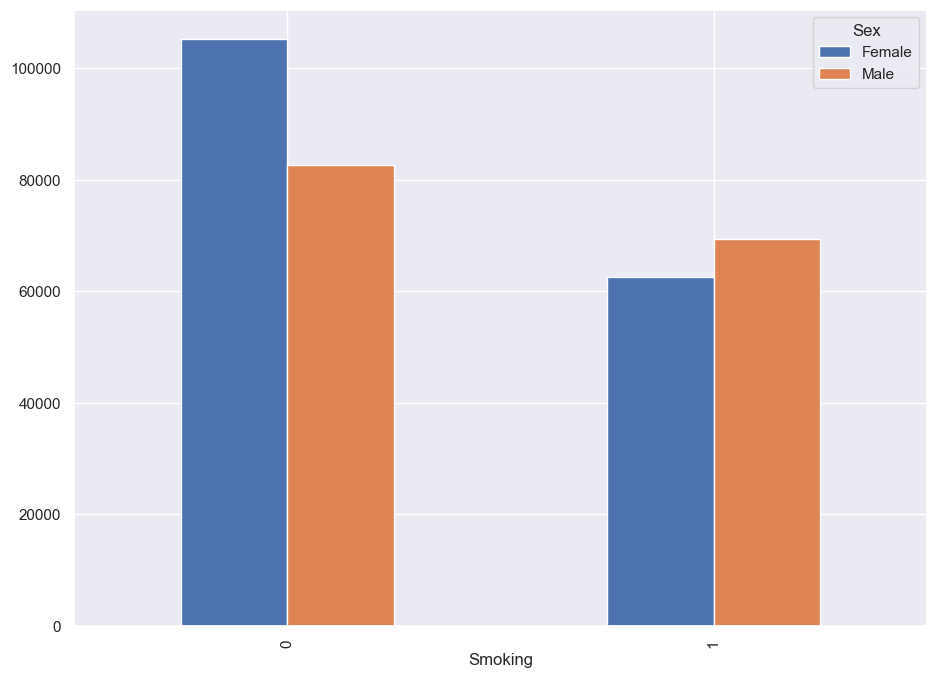

In [29]:
cross_plot = pd.crosstab(data["Smoking"],data["Sex"])
cross_plot.plot(kind="bar")

<AxesSubplot:xlabel='HeartDisease'>

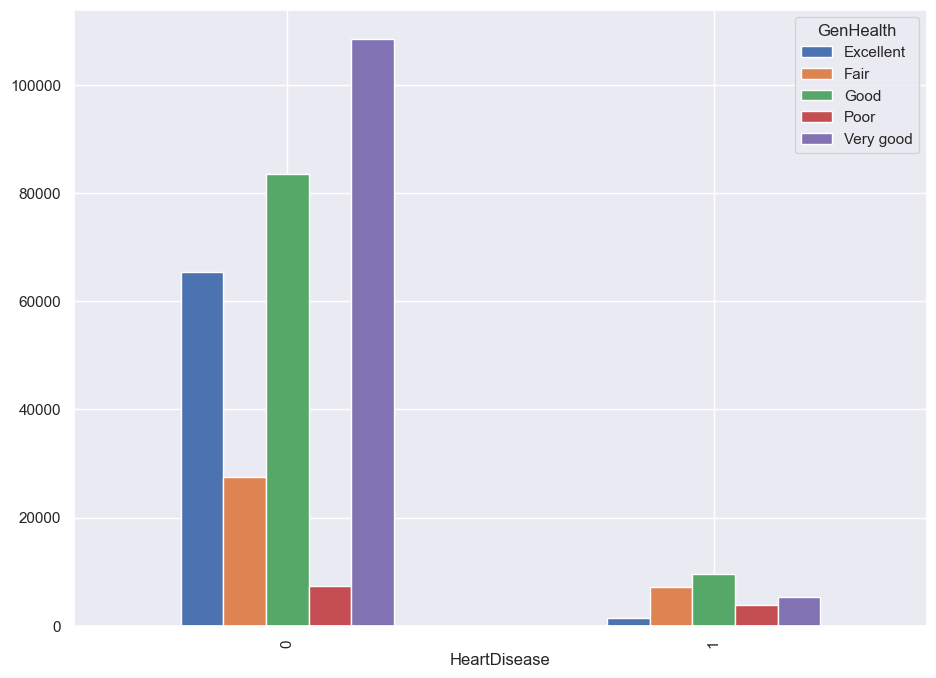

In [30]:
cross_plot = pd.crosstab(data["HeartDisease"],data["GenHealth"])
cross_plot.plot(kind="bar")

In [31]:
mentalhealth = data.groupby("Race")["MentalHealth"].sum().sort_values(ascending=False).reset_index()

In [32]:
mentalhealth

,Race,MentalHealth
0,White,929580.0
1,Hispanic,114952.0
2,Black,96609.0
3,Other,57107.0
4,American Indian/Alaskan Native,26199.0
5,Asian,22231.0


<AxesSubplot:xlabel='Race', ylabel='MentalHealth'>

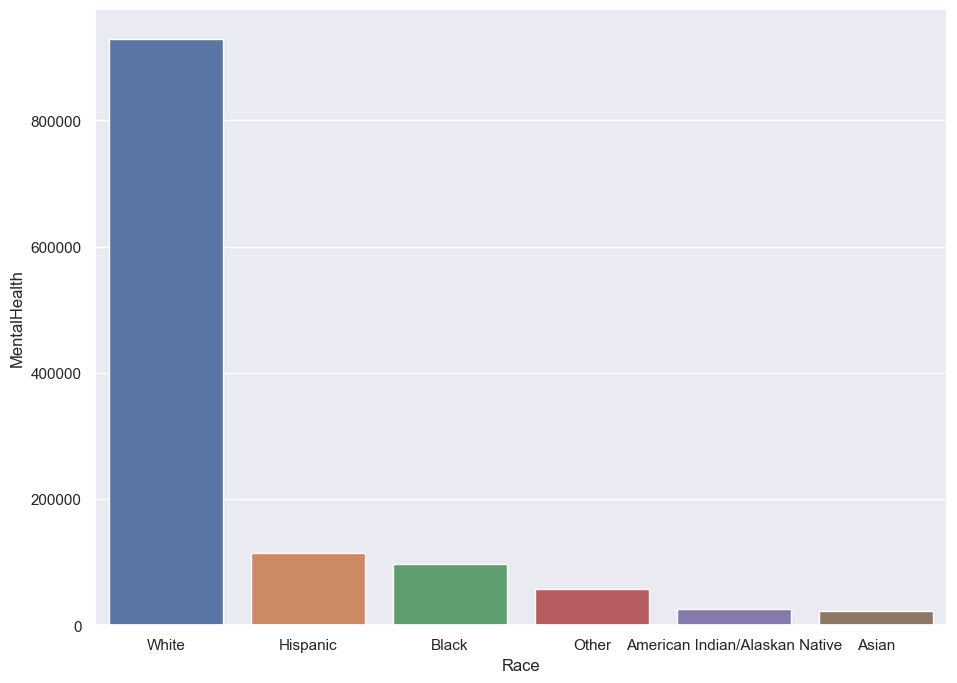

In [33]:
sns.barplot(y="MentalHealth",x="Race",data=mentalhealth)

<AxesSubplot:xlabel='KidneyDisease'>

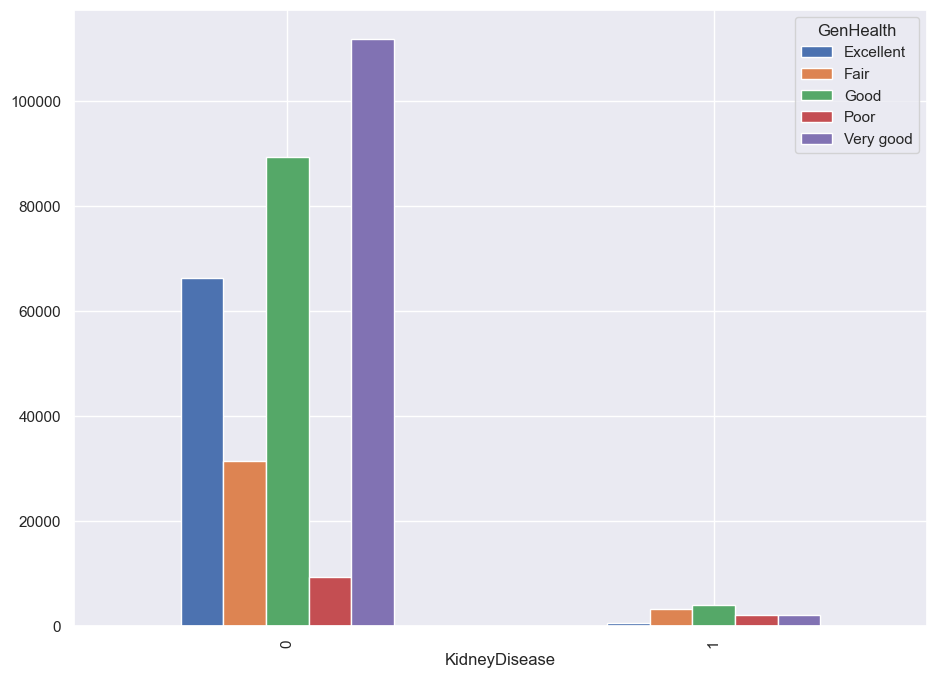

In [34]:
cross_plot = pd.crosstab(data["KidneyDisease"],data["GenHealth"])
cross_plot.plot(kind="bar")

<AxesSubplot:xlabel='GenHealth'>

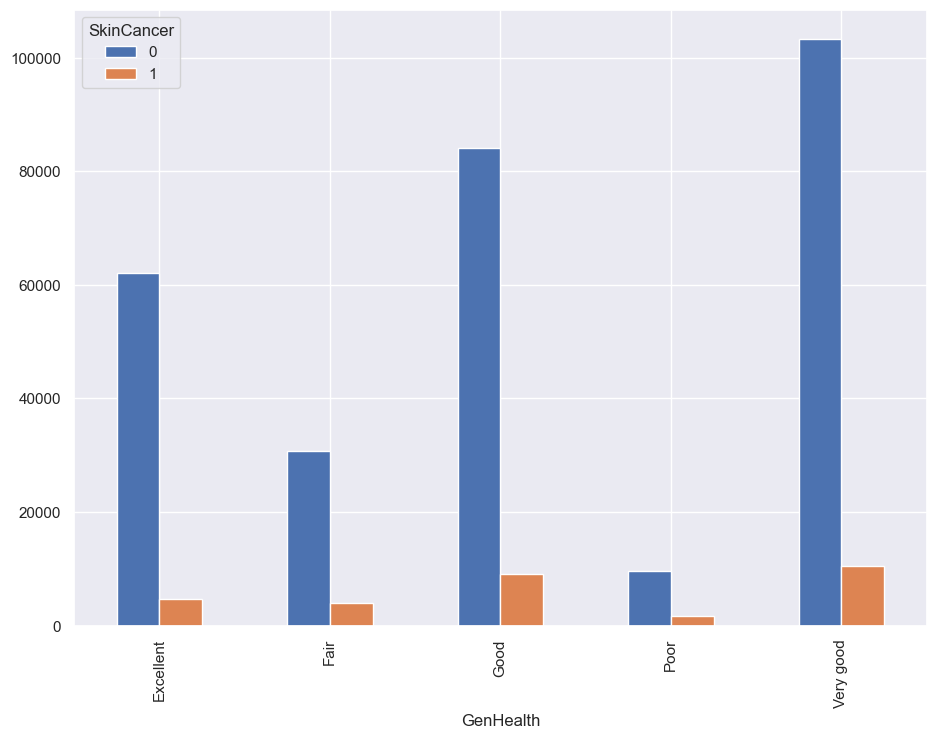

In [35]:
cross_plot = pd.crosstab(data["GenHealth"],data["SkinCancer"])
cross_plot.plot(kind="bar")